In [142]:
import librosa
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


In [143]:
#Audio conditional resampling
import librosa
import os
import soundfile as sf

def resample_audio(input_path, output_path, target_sr=44100):
    # Load the audio file
    audio, sr = librosa.load(input_path, sr=None)
    
    # Resample the audio to the target sampling rate
    if sr != target_sr:
        print(f"The current sampling rate is different from the target sampling rate, The current sampling rate is {sr}")
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    
    # Save the resampled audio
    sf.write(output_path, audio, target_sr)

    audio, new_sr = librosa.load(output_path, sr=None)
    print(f"The updated sampling rate is {new_sr}")
    


In [144]:
# raw_file_path = '../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Raw/AK-47/1 (11).wav'
# sampling_made_consistent_path = 'sampling_made_consistent.wav'
# resample_audio(raw_file_path, sampling_made_consistent_path)
# print("Succesfully resampled.")

In [145]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

def normalize_audio(y):
    """Normalize the audio to a range of -1 to 1."""
    return y / np.max(np.abs(y))

In [146]:
# y, sr = librosa.load(sampling_made_consistent_path, sr=44100)

# sampling_and_volume_normalized_path = 'sampling_and_volume_normalized.wav'
# sf.write(sampling_and_volume_normalized_path, normalize_audio(y), sr)
# print("Audio successfully normalized.")

In [147]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def create_spectrogram(sampling_and_volume_normalized_path):
    # Load the audio file with a sampling rate of 44100 Hz
    y, sr = librosa.load(sampling_and_volume_normalized_path, sr=44100)

    # Create the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

    # Plot and save the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

    # Save the spectrogram as an image in the same directory as the Jupyter notebook
    file_name = os.path.basename(sampling_and_volume_normalized_path).replace('.wav', '.png')
    plt.savefig(file_name)
    plt.close()


In [148]:
########Calling re-sampling on raw audio
raw_file_path = '../Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Raw/M249/6 (8).wav'
sampling_made_consistent_path = 'sampling_made_consistent.wav'
resample_audio(raw_file_path, sampling_made_consistent_path)
print("Succesfully resampled.")


#########Calling Volume normalization on re-sampled audio
y, sr = librosa.load(sampling_made_consistent_path, sr=44100)

sampling_and_volume_normalized_path = 'sampling_and_volume_normalized.wav'
sf.write(sampling_and_volume_normalized_path, normalize_audio(y), sr)
print("Audio successfully normalized.")

#########Calling to create Spectrogram on re-sampled and volume normalized audio
create_spectrogram(sampling_and_volume_normalized_path)
print("Spectrogram successfully created.")

The current sampling rate is different from the target sampling rate, The current sampling rate is 48000
The updated sampling rate is 44100
Succesfully resampled.
Audio successfully normalized.
Spectrogram successfully created.


In [149]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt
# image_path = 'sampling_and_volume_normalized.png'
# model_path = '../Trained_Models/gunshot_model.keras'

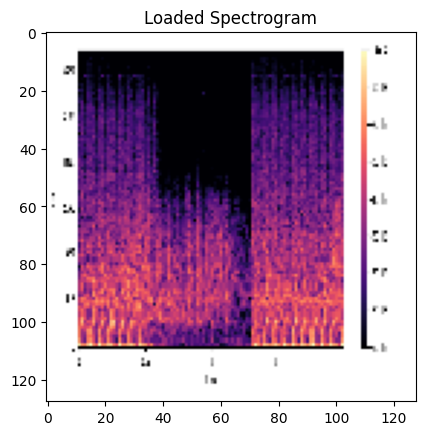

1/1 [==============================] - 0s 93ms/step
Predicted gun type: M16


In [150]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to your saved model
model_path = '../Trained_Models/gunshot_model.keras'

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Path to the spectrogram image you want to test
image_path = 'sampling_and_volume_normalized.png'

# Load the image
img = image.load_img(image_path, target_size=(128, 128))

# Display the image (optional)
plt.imshow(img)
plt.title("Loaded Spectrogram")
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image
img_array = img_array / 255.0

# Make a prediction using the trained model
prediction = model.predict(img_array)

# Decode the prediction (assuming you have a list of class labels)
class_labels = ['AK-12', 'AK-47', 'IMI Desert Eagle', 'M4', 'M16', 'M249', 'MG-42', 'MP5', 'Zastava M92']
predicted_class = np.argmax(prediction)

predicted_gun_type = class_labels[predicted_class]
print(f"Predicted gun type: {predicted_gun_type}")